In [1]:
from datasets import load_dataset

dataset = load_dataset("openlifescienceai/medmcqa", split="train")

Found cached dataset parquet (C:/Users/Nicho/.cache/huggingface/datasets/openlifescienceai___parquet/openlifescienceai--medmcqa-a13cf87d3a0c027d/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


In [2]:
print(dataset)

Dataset({
    features: ['id', 'question', 'opa', 'opb', 'opc', 'opd', 'cop', 'choice_type', 'exp', 'subject_name', 'topic_name'],
    num_rows: 182822
})


In [3]:
# filter for single choice questions and Pathology as subject
filtered_dataset = dataset.filter(lambda example: example['subject_name'] == 'Pathology' and 
                                  example['choice_type'] == 'single')
print(f"nubmer of examples: {len(filtered_dataset)}")

Loading cached processed dataset at C:\Users\Nicho\.cache\huggingface\datasets\openlifescienceai___parquet\openlifescienceai--medmcqa-a13cf87d3a0c027d\0.0.0\14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7\cache-493c365cada9b43f.arrow


nubmer of examples: 9922


In [4]:
# filter for examples with explanations of at least 200 characters
filtered_dataset = filtered_dataset.filter(lambda example: len(str(example['exp'])) >= 200)
print(f"nubmer of examples: {len(filtered_dataset)}")

Loading cached processed dataset at C:\Users\Nicho\.cache\huggingface\datasets\openlifescienceai___parquet\openlifescienceai--medmcqa-a13cf87d3a0c027d\0.0.0\14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7\cache-797ab1fff76a30e6.arrow


nubmer of examples: 6328


In [5]:
import pandas as pd
df_filtered = pd.DataFrame(filtered_dataset)

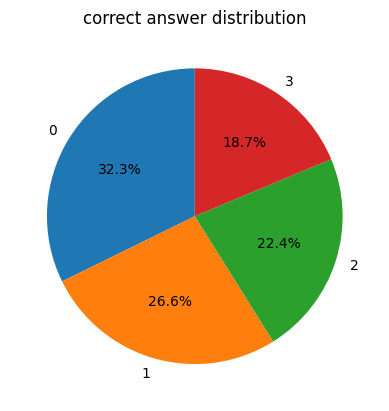

In [6]:
# plot distribution of correct answer options
import matplotlib.pyplot as plt
df_filtered['cop'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide the y-label
plt.title('correct answer distribution')
plt.show()

The correct option distribution isn't completely even 

## Getting equally sized quadrants for exp length

In [7]:
# Calculate explanation lengths
df_filtered['exp_length'] = df_filtered['exp'].apply(len)

In [8]:
expl_length_stats = df_filtered['exp_length'].describe()
expl_length_stats


count    6328.000000
mean      721.140171
std       605.342613
min       200.000000
25%       349.000000
50%       545.000000
75%       855.250000
max      7037.000000
Name: exp_length, dtype: float64

In [9]:
# create splits
df_filtered['quantile'] = pd.qcut(df_filtered['exp_length'], q=4, labels=False)
quantiles = [df_filtered[df_filtered['quantile'] == i] for i in range(4)]
df_q1 = quantiles[0]
df_q2 = quantiles[1]
df_q3 = quantiles[2]
df_q4 = quantiles[3]

In [10]:
print("Q1 size: ",len(quantiles[0]))
print("Q2 size: ",len(quantiles[1]))
print("Q3 size: ",len(quantiles[2]))
print("Q4 size: ",len(quantiles[3]))

Q1 size:  1587
Q2 size:  1583
Q3 size:  1576
Q4 size:  1582


In [11]:
# sample from subsets with equal cop (correct answer options) distribution
# 4 options; sample 15 from each option -> 60 total
q1_samples = df_q1.groupby('cop').sample(n=15, random_state=1)
q2_samples = df_q2.groupby('cop').sample(n=15, random_state=1)
q3_samples = df_q3.groupby('cop').sample(n=15, random_state=1)
q4_samples = df_q4.groupby('cop').sample(n=15, random_state=1)

In [18]:
# merge samples and write to csv
medmcqa_subset = pd.concat([q1_samples, q2_samples, q3_samples, q4_samples], axis=0)
medmcqa_subset.to_csv('data/medmcqa_subset.csv')

In [13]:
medmcqa_subset

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name,exp_length,quantile
3788,34c05134-495c-4958-b119-4e7a760dfc5d,Role of macrophages in antibody production is?,Antigen presentation,B cell production,Class switching,B cell activation,0,single,Ans. (a.) Antigen presentation(Ref: Robbins 9t...,Pathology,Immunity,332,0
4342,a9c08579-1a3d-4cd5-8cb4-abf542af2cf4,Hereditary retinoblastoma develop as a result ...,13q 14,13p 14,14p 13,14q 13,0,single,Hereditary retinoblastomas develop from the de...,Pathology,None,307,0
574,f62de10a-2874-4e17-a616-ea94be87cd30,A 11-year-old boy came with history of cough f...,Tuberculosis,Leprosy,Sarcoidosis,Syphilis,0,single,Cavitation occurs only in secondary tuberculos...,Pathology,NEET Jan 2020,281,0
876,b12fd27f-85d6-4b32-b59d-aea4201280cb,Source of vitamin B12?,Animal source,Plant source,Milk,Fruits,0,single,Ans. (a) Animal SourceRef: Harrison / 640Only ...,Pathology,Environment & Nutritional Pathology,315,0
4539,6b6997dd-d219-4677-bb2e-049e3f1344aa,Histologic sections of skin from an area of su...,Epidermal edema,Intraepidermal vesicles,Full-thickness epithelial necrosis,Partial dermal necrosis,0,single,"First-degree burns, such as with a sunburn, ar...",Pathology,None,261,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,8e17ad95-a764-4105-ba2b-0d1b804ace27,A 70 year old alcoholic presents with abdomina...,Serum calcitonin,CA19-9,Alkaline phosphatase,Alpha-fetoprotein,3,single,"Answer: d) Alpha-fetoprotein (ROBBINS 9th ED, ...",Pathology,Liver & Biliary Tract,1047,3
803,59aa61ee-d6ce-43cb-84cf-8c80acda7359,A 36-year-old woman presents with a 6-month hi...,Central hyaline sclerosis,Cholangiocarcinoma,Hemosiderosis,Intrahepatic bile duct damage,3,single,Primary biliary cirrhosis (nonsuppurative dest...,Pathology,Liver & Biliary Tract,1283,3
2534,91eda14d-2b63-4bcc-941d-5844c1f62ac1,Although more than 400 blood groups have been ...,It was the first blood group system to be disc...,"It has four different blood groups A,B, AB, O ...",ABO(H) antigens are present in most body tissu...,ABO(H) antibodies are invariably present in pl...,3,single,The basic difference between the ABO blood gro...,Pathology,None,1285,3
4421,9c88f28e-2309-4836-b85e-60a3cabca12c,"In hemophiliac patients, which of the followin...",Factor VIII concentrate,Cryoprecipitate,EACA,Platelet factor,3,single,"Antifibrinolytic Drugs:\nBleeding in the gum, ...",Pathology,None,2722,3


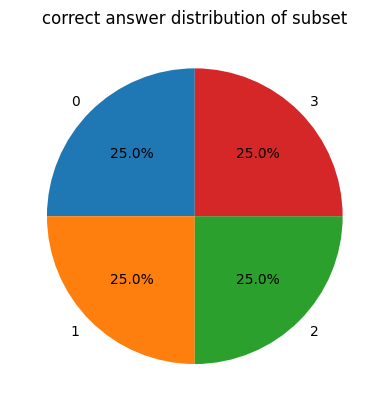

In [14]:
medmcqa_subset['cop'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide the y-label
plt.title('correct answer distribution of subset')
plt.show()

In [15]:
# function to remove rows from df1 that exist in df2
def filter_dataframes(df1, df2):
    df1_tuples = set(df1.apply(tuple, axis=1))
    df2_tuples = set(df2.apply(tuple, axis=1))

    filtered_tuples = df1_tuples - df2_tuples
    filtered_df = pd.DataFrame(list(filtered_tuples), columns=df1.columns)
    
    return filtered_df

In [16]:
# get sample for CoT example candidates 
# remove samples from quantile subsets
df_q1 = filter_dataframes(df_q1, q1_samples)
df_q2 = filter_dataframes(df_q2, q2_samples)
df_q3 = filter_dataframes(df_q3, q3_samples)
df_q4 = filter_dataframes(df_q4, q4_samples)

In [17]:
# make cot example candidate dataframe
# select 10 examples from each quantile
candidate_cot_df = pd.concat([df_q1[:10], df_q2[:10], df_q3[:10], df_q4[:10]], axis=0)
candidate_cot_df.to_csv('data/candidate_cot_dataset.csv', index=False)